<a href="https://colab.research.google.com/github/chexki/Fashion_Detection_DL_CNN/blob/master/Fasion_detect_Multi_lab_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive Where the data is stored.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Necessary imports

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [21]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [23]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images[0].shape

(28, 28)

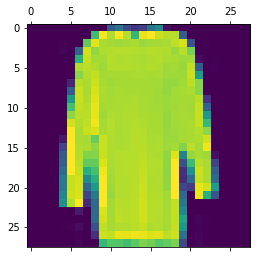

In [34]:
 plt.matshow((train_images[350]/1000.0))

In [38]:
len(image_data_train[0])

2

In [0]:
# Load the image data from GDrive to ImageDataGenerator.
# ImageDataGenerator will generate multiple images from a single image with given parameters.

# created datagen object.
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True, 
                             validation_split=0.33)

In [4]:
# Split Training and Validation data using "flow_from_directory"

image_data_train = datagen.flow_from_directory('/content/gdrive/My Drive/Projects/Fashion Detection/keras-multi-label/dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')

image_data_val = datagen.flow_from_directory('/content/gdrive/My Drive/Projects/Fashion Detection/keras-multi-label/dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 1454 images belonging to 6 classes.
Found 711 images belonging to 6 classes.


(32, 224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


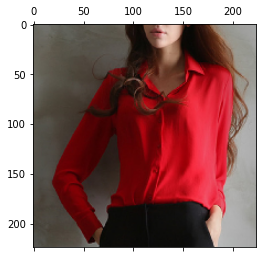

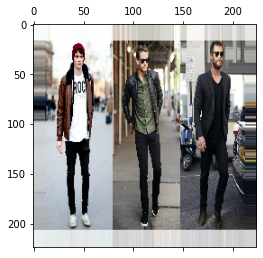

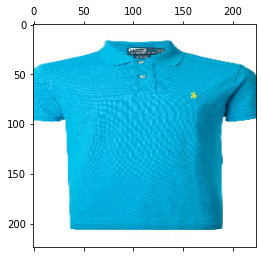

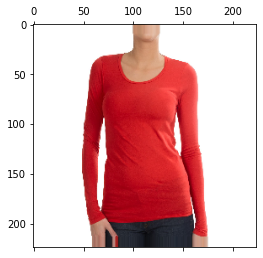

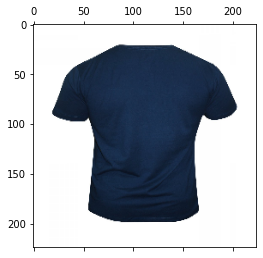

In [24]:
x = 0
for i in image_data_train:
  for b in i:
    print(b.shape) 
    for a in b:
      print(a.shape)
      plt.matshow(a)
      x = x + 1
      if x == 5:
        break
    break
  break
#plt.matshow(X_train[0])

In [0]:
# Create a CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 394272)           

In [0]:
# Compile Model
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [0]:
# Fit the Model
model.fit_generator(generator=image_data_train, 
                    steps_per_epoch=2,
                    validation_steps=32,
                    epochs=5)

Epoch 1/5
2/2 [==============================] - 34s 17s/step - loss: 2.2213 - accuracy: 0.7448
Epoch 2/5
2/2 [==============================] - 24s 12s/step - loss: 1.4364 - accuracy: 0.7760
Epoch 3/5
2/2 [==============================] - 37s 19s/step - loss: 0.9454 - accuracy: 0.7917
Epoch 4/5
2/2 [==============================] - 41s 21s/step - loss: 0.6175 - accuracy: 0.8021
Epoch 5/5
2/2 [==============================] - 24s 12s/step - loss: 0.6220 - accuracy: 0.8177


In [0]:

dl_out = model.predict(x_test_ensb)

In [0]:
# Create a Model to get Multi Output Using Keras Function's API 

In [0]:
#######################################################################################################################################################

**Using Keras Tuner to Optimize layers**

In [18]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=97ef4fff849b26b7abaf18b5ad3f28be9b1f69c044540fdba255e0f1e95e0f53
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=9e7a37004c17d2d209b8df10067c5f9165d721f4e2adb4dd591590cdf7910409
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [0]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(6, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [52]:
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Fashion")

INFO:tensorflow:Reloading Oracle from existing project output/Fashion/oracle.json


In [0]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)


In [53]:
tuner_search.search(image_data_train,
        steps_per_epoch= 2 , # steps per epoch
        epochs=3,
        validation_data=image_data_val,
        validation_steps=1,
        max_queue_size=2,
        workers=1)

Epoch 1/3


InvalidArgumentError: ignored

In [0]:
# tuner = ...
# tuner.search(myGen('train', tr_data, tr_y, batch_size, True),
#         steps_per_epoch=int((len(tr_data)-1) / batch_size), # steps per epoch
#         epochs=epochs,
#         validation_data=
#                 myGen('valid', te_data, te_y, batch_size, True),
#         validation_steps=1,
#         max_queue_size=2,
#         workers=1)

In [0]:
# BEST MODEL
model=tuner_search.get_best_models(num_models=1)[0]

In [0]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)